In [1]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']
fp = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\BayesUCBGaussian.csv'
amide=get_accuracy_bandit_model(fp, best_conditions)
print(amide)
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\svm_history_500_mordred.csv'
amide_regressoin=get_accuracy_bandit_model(fp, best_conditions)
print(amide_regressoin)

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.402
146    0.396
147    0.396
148    0.410
149    0.386
Length: 150, dtype: float64
0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.636
146    0.670
147    0.672
148    0.668
149    0.666
Length: 150, dtype: float64


In [2]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']
fp = r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\\MAB\Random.csv'
random=get_accuracy_bandit_model(fp, best_conditions)
print(random)

fp= r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\ETC.csv'
ETC=get_accuracy_bandit_model(fp, best_conditions)
print(ETC)

0      0.028
1      0.020
2      0.026
3      0.030
4      0.020
       ...  
145    0.028
146    0.030
147    0.032
148    0.018
149    0.030
Length: 150, dtype: float64
0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.312
146    0.312
147    0.312
148    0.312
149    0.312
Length: 150, dtype: float64


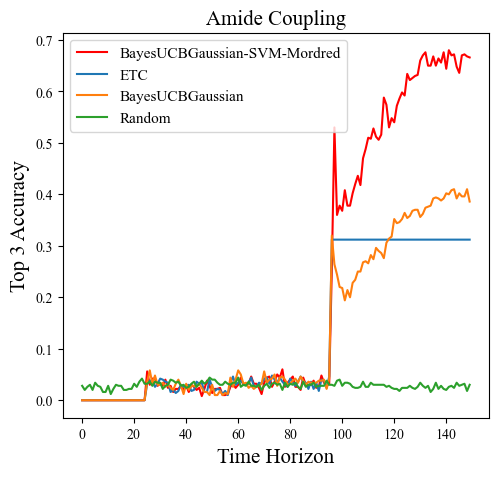

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(5.5, 5))
plt.rcParams['axes.unicode_minus'] = False

plt.plot(amide_regressoin, label='BayesUCBGaussian-SVM-Mordred',color='red')
plt.plot(ETC,label='ETC')
plt.plot(amide, label='BayesUCBGaussian')
plt.plot(random, label='Random')

plt.title('Amide Coupling', fontsize=15)

plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('Top 3 Accuracy', fontsize=15)
plt.legend(fontsize=11)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\Figure 6-b_the.png', dpi=500, bbox_inches='tight', pad_inches=0)

plt.show()